In [8]:
from io import StringIO
import matplotlib.ticker as mticker
import pandas as pd
from matplotlib import pyplot as plt

data = StringIO("""
problem,language,time,size
n-body,c,2.13,1633
mandelbrot,c,1.3,1135
spectral norm,c,0.41,1197
fannkuch-redux,c,7.58,910
fasta,c,0.78,1463
k-nucleotide,c,3.96,1506
binary-trees,c,1.58,809
reverse-complement,c,0.41,1965
pidigits,c,0.56,1090
regex-redux,c,0.8,1397
n-body,Java,6.77,1489
mandelbrot,Java,4.1,796
spectral norm,Java,1.55,756
fannkuch-redux,Java,10.48,1282
fasta,Java,1.2,2543
k-nucleotide,Java,4.83,1812
binary-trees,Java,2.51,835
reverse-complement,Java,1.57,2183
pidigits,Java,0.79,764
regex-redux,Java,5.34,929
n-body,python,541.34,1196
mandelbrot,python,177.35,688
spectral norm,python,112.97,407
fannkuch-redux,python,341.45,950
fasta,python,36.9,1947
k-nucleotide,python,46.31,1967
binary-trees,python,44.7,660
reverse-complement,python,6.62,814
pidigits,python,1.16,567
regex-redux,python,1.34,1403
n-body,julia,4.21,1111
mandelbrot,julia,1.42,619
spectral norm,julia,1.11,429
fannkuch-redux,julia,7.83,1067
fasta,julia,1.13,1082
k-nucleotide,julia,4.94,951
binary-trees,julia,7.28,634
reverse-complement,julia,1.44,522
pidigits,julia,0.97,506
regex-redux,julia,1.74,759
""")


               problem language    time  size
0               n-body        c    2.13  1633
1           mandelbrot        c    1.30  1135
2        spectral norm        c    0.41  1197
3       fannkuch-redux        c    7.58   910
4                fasta        c    0.78  1463
5         k-nucleotide        c    3.96  1506
6         binary-trees        c    1.58   809
7   reverse-complement        c    0.41  1965
8             pidigits        c    0.56  1090
9          regex-redux        c    0.80  1397
10              n-body     Java    6.77  1489
11          mandelbrot     Java    4.10   796
12       spectral norm     Java    1.55   756
13      fannkuch-redux     Java   10.48  1282
14               fasta     Java    1.20  2543
15        k-nucleotide     Java    4.83  1812
16        binary-trees     Java    2.51   835
17  reverse-complement     Java    1.57  2183
18            pidigits     Java    0.79   764
19         regex-redux     Java    5.34   929
20              n-body   python  5

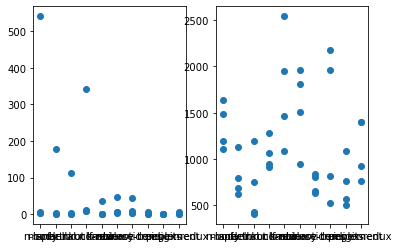

In [9]:
df = pd.read_csv(data)
df_c = df[df["language"] == "c"].copy()
print(df.to_string())
shape_dict = {"c": ".", "Java": "s", "python": "D", "julia": "o"}
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(df["problem"],df["time"])
ax[1].scatter(df["problem"],df["size"])

In [10]:
for lang in df["language"].unique():
    df_to_plot = df[df["language"] == lang].copy()
    df_to_plot["time"] = df_to_plot["time"].to_numpy() / df_c["time"].to_numpy()
    df_to_plot["size"] = df_to_plot["size"].to_numpy() / df_c["size"].to_numpy()
    color = "gold" if lang == "julia" or lang == "c" else "grey"

    if (lang == "c"):
        ax[0].plot(df_to_plot["problem"], df_to_plot["time"], color=color, label=lang)
        ax[1].plot(df_to_plot["problem"].astype('str'), df_to_plot["size"], color=color, label=lang)
    else:
        ax[0].scatter(df_to_plot["problem"], df_to_plot["time"], marker=shape_dict[lang], color=color, label=lang)
        ax[1].scatter(df_to_plot["problem"], df_to_plot["size"], marker=shape_dict[lang], color=color, label=lang)

ax[0].set_yscale("log")
ax[0].set_ylabel("execution time (relative to C)")
ax[1].set_ylabel("code size (relative to C)")

Text(179.44318181818178, 0.5, 'code size (relative to C)')

In [11]:
fontDict = {'horizontalalignment': "right"}
for axis in ax:
    ticks_loc = axis.get_xticks()
    axis.xaxis.set_major_locator(mticker.FixedLocator(locs=list(range(10))))
    axis.set_xticklabels(labels=df_to_plot["problem"], rotation=45, fontsize=8, fontdict=fontDict)



In [12]:
# plt.legend()
for axis in ax: axis.legend()
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>